---
title: "Car Types"
author: "Erick Borda"
date: "2023-10-10"
output: pdf_document
---

# CarType Dataset Analysis Project

The goal of this analysis is to use statistical techniques on the "CarType" dataset to gain new insights and data understanding. The "CarType" dataset will be analyze with **#R**. Addressing specific business inquiries: identifying the most fuel-efficient car type and determining the most environmentally friendly car. Elaboration on particular tasks is outlined below, encompassing a concise project overview, the identified problem, the approach taken, and the major discoveries

## 1. Identified Problem

The primary problem is to identify the car type that offers the highest fuel efficiency and to determine the most environmentally friendly car based on the given dataset. This involves analyzing relevant features and variables that influence fuel efficiency and environmental impact.

## 2. Research Question

In this project, we will have a dual focus:

1.  Fuel Economy (FE) - Our research will center on optimizing fuel efficiency in various driving conditions.

2.  CO2 Emission - We will examine vehicle emissions, specifically focusing on reducing carbon dioxide (CO2) emissions.

Additionally, we will place a distinct emphasis on the **Urban sector**, delving into the unique challenges and opportunities it presents for both fuel economy and emissions analysis

### 2.1. What type of car provides the most fuel economy?

Based on the question the Null Hypothesis is:

**H0:** There is no difference in City FE between vehicles with different Cylinders, Engine Displacement and Division.

**H1:** There is difference in City FE between vehicles with different Cylinders, Engine Displacement and Division.

### 2.2. What type of car provides the most fuel economy?

Based on the question the Null Hypothesis is:

**H0:** There is no difference in City CO2 between vehicles with different Cylinders, Gears, Engine Displacement and Division.

**H1:** There is difference in City CO2 between vehicles with different Cylinders, Gears, Engine Displacement and Division.

## 3. Data Cleaning.

In the initial phase, it is essential to identify all the libraries that will be used in this project.

### 3.1. Importing Libraries.

In [95]:
# Import the installed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from scipy import stats
from scipy.stats import skew
from scipy.stats import shapiro
from scipy.stats import spearmanr
from scipy.stats import kruskal

**Loading Excel files**, First step is setting the path:

In [4]:
df = pd.read_excel("cartype.xls")

### 3.2. Missing data

In [5]:
# Check for missing data
missing_values = df.isna()

# Summarize missing values by column
missing_summary = missing_values.sum()

# Display the summary
print(missing_summary)

Model Year                  0
Mfr Name                    0
Division                    0
Carline                     0
Engine Displacement         0
# Cylinders                 0
Transmission                0
City FE                     0
Highway FE                  0
Combined FE                 0
Air Aspiration Method       0
Transmission Description    0
# Gears                     0
Drive Desc                  0
Carline Class Desc          0
Release Date                0
City CO2                    0
Highway CO2                 0
Combined CO2                0
dtype: int64


### 3.3. Duplicate data.

**Identified the duplicated data**, by using the following code:

In [6]:
# Check for duplicate data
duplicates = df.duplicated()

# Summarize duplicate data
total_duplicates = sum(duplicates)

# Display the total number of duplicates
print(total_duplicates)

7


**Remove duplicate data**, executing the following code:

In [7]:
# Remove duplicate rows
df_no_duplicates = df[~df.duplicated()]

# Display the DataFrame with duplicates removed
print(df_no_duplicates)

     Model Year             Mfr Name                  Division        Carline  \
0          2015         aston martin  Aston Martin Lagonda Ltd  V12 Vantage S   
1          2015         aston martin  Aston Martin Lagonda Ltd     V8 Vantage   
2          2015         aston martin  Aston Martin Lagonda Ltd     V8 Vantage   
3          2015         aston martin  Aston Martin Lagonda Ltd   V8 Vantage S   
4          2015         aston martin  Aston Martin Lagonda Ltd   V8 Vantage S   
..          ...                  ...                       ...            ...   
724        2015        Mercedes-Benz             Mercedes-Benz  GL 550 4MATIC   
725        2015        Mercedes-Benz             Mercedes-Benz  ML 350 4MATIC   
726        2015        Mercedes-Benz             Mercedes-Benz  ML 350 4MATIC   
727        2015        Mercedes-Benz             Mercedes-Benz  ML 400 4MATIC   
728        2015  Volkswagen Group of                Volkswagen        Touareg   

     Engine Displacement  #

## 4. Data Exploration.

### 4.1. Exploration for Numerical Data.

Descriptive statistics of all numeric data-fields:

In [9]:
df_no_duplicates.describe()

,Model Year,Engine Displacement,# Cylinders,City FE,Highway FE,Combined FE,# Gears,City CO2,Highway CO2,Combined CO2
count,722.0,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,2015.0,3.150139,5.632964,20.094183,28.254848,23.040166,6.472299,470.173130,329.343490,406.753463
std,0.0,1.352454,1.806805,4.930529,5.786194,5.227400,1.168202,119.249696,71.191083,96.484792
min,2015.0,1.000000,3.000000,8.000000,15.000000,10.000000,1.000000,202.000000,199.000000,209.000000
25%,2015.0,2.000000,4.000000,17.000000,24.000000,19.000000,6.000000,382.000000,277.000000,337.000000
50%,2015.0,3.000000,6.000000,19.500000,28.000000,23.000000,6.000000,453.500000,319.000000,393.000000
75%,2015.0,3.700000,6.000000,23.000000,32.000000,27.000000,7.000000,536.000000,369.750000,461.000000
max,2015.0,8.000000,16.000000,44.000000,46.000000,42.000000,9.000000,1050.000000,599.000000,847.000000


### 4.2. Categorical Data.

Descriptive statistics of all categorical data-fields:

A method that get descriptive statistcs for categorical data with a bar graph is show below:

In [37]:
def calculate_categorical_stats(data, col):
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input 'data' must be a DataFrame.")

    if not isinstance(col, pd.Series):
        raise ValueError("Input 'col' must be a pandas Series representing a column.")

    stats = None
    plt_obj = None
    print("Here >>>")
    if col.dtype == 'object':
        print("Here Object >>>")
        unique_values = col.value_counts()
        percentage_distribution = (unique_values / len(col)) * 100
        stats = pd.DataFrame({
            'Value': unique_values.index,
            'Frequency': unique_values.values,
            'Percentage': percentage_distribution.values
        })

        # Create a bar plot
        plt_obj = stats.plot(x='Value', y='Frequency', kind='bar', title="Frequency of the column")
        plt_obj.set_xlabel('Value')
        plt_obj.set_ylabel('Frequency')
    elif pd.api.types.is_numeric_dtype(col):
        print("Here numeric dt >>>")
        unique_values = col.value_counts()
        print(len(unique_values))
        percentage_distribution = (unique_values / len(col)) * 100
        stats = pd.DataFrame({
                'Value': unique_values.index,
                'Frequency': unique_values.values,
                'Percentage': percentage_distribution.values
            })

        # Create a bar plot
        plt_obj = stats.plot(x='Value', y='Frequency', kind='bar', title="Frequency of the column")
        plt_obj.set_xlabel('Value')
        plt_obj.set_ylabel('Frequency')
    else:
        raise ValueError("Column type not supported.")

    return stats, plt_obj

#### 4.2.1. Number of Cylinders

   Value  Frequency  Percentage
0      4        313   43.351801
1      6        247   34.210526
2      8        137   18.975069
3     12         12    1.662050
4     10          5    0.692521
5      3          4    0.554017
6      5          3    0.415512
7     16          1    0.138504


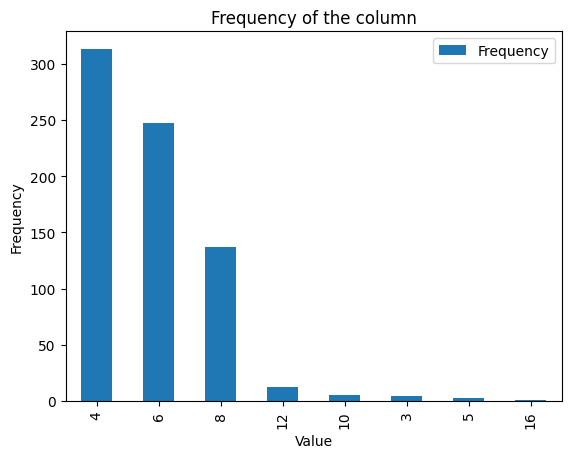

In [17]:
# Call the calculate_categorical_stats function
stats, plot = calculate_categorical_stats(df_no_duplicates, df_no_duplicates['# Cylinders'])

# Display the statistics
print(stats)

#### 4.2.2. Engine Displacement

Here >>>
Here numeric dt >>>
38


,Value,Frequency,Percentage
0,2.0,136,18.836565
1,3.0,77,10.664820
2,3.6,58,8.033241
3,1.6,53,7.340720
4,2.4,45,6.232687
5,3.5,38,5.263158
6,2.5,27,3.739612
7,4.4,23,3.185596
8,1.8,23,3.185596
9,6.2,20,2.770083


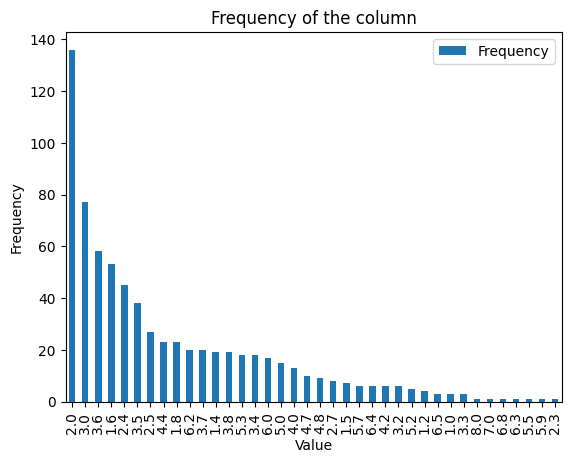

In [42]:
# Call the calculate_categorical_stats function
stats, plot = calculate_categorical_stats(df_no_duplicates, df_no_duplicates['Engine Displacement'])

# Display the statistics
stats

#### 4.2.3. Division

Here >>>
Here Object >>>


,Value,Frequency,Percentage
0,BMW,85,11.772853
1,Chevrolet,59,8.171745
2,Audi,53,7.340720
3,Porsche,47,6.509695
4,Mini,34,4.709141
5,Mercedes-Benz,31,4.293629
6,KIA MOTORS CORPORATION,31,4.293629
7,Jeep,29,4.016620
8,Volkswagen,29,4.016620
9,Ford,26,3.601108


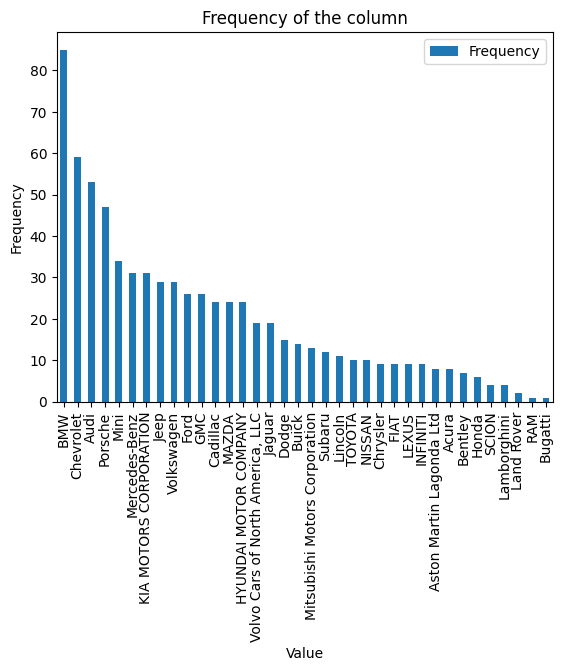

In [43]:
# Call the calculate_categorical_stats function
stats, plot = calculate_categorical_stats(df_no_duplicates, df_no_duplicates['Division'])

# Display the statistics
stats

### 4.3. Outliers.

Only the datafields related to Fuel economy and CO2 will be evaluated due to the research question

#### 4.3.1. Fuel Economy.
A method will be created to visualize the outliers by specific column

In [46]:
def generate_boxplot_and_get_outliers(df, column_name):
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return []

    plt.figure(figsize=(8, 5))
    plt.boxplot(df[column_name])
    plt.title(f'Boxplot for {column_name}')
    plt.ylabel(column_name)

    # Calculate the lower and upper bounds for outliers
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find and return the outlier values and their corresponding rows
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    plt.show()

    return outliers


**City FE**

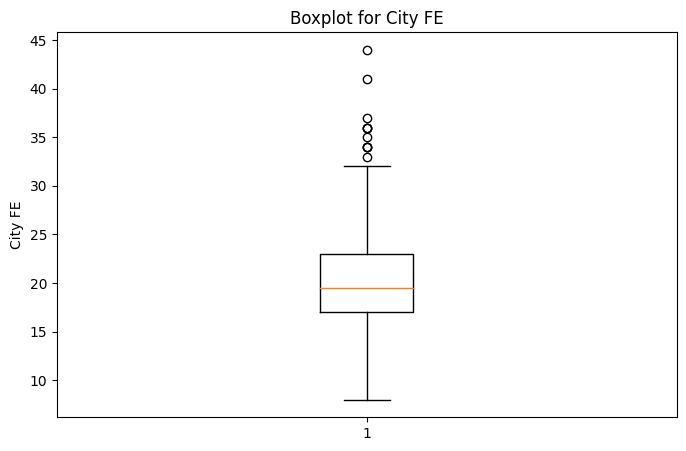

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
40,2015,Mercedes-Benz,Mercedes-Benz,Smart fortwo (Convertible),1.0,3,Auto,34,38,36,Naturally Aspirated,Automated Manual,5,"2-Wheel Drive, Rear",Two Seaters,2014-06-03,256,228,244
41,2015,Mercedes-Benz,Mercedes-Benz,Smart fortwo (COUPE),1.0,3,Auto,34,38,36,Naturally Aspirated,Automated Manual,5,"2-Wheel Drive, Rear",Two Seaters,2014-06-03,256,228,244
282,2015,Mitsubishi Motors Co,Mitsubishi Motors Corporation,MIRAGE,1.2,3,Auto,37,44,40,Naturally Aspirated,Continuously Variable,1,"2-Wheel Drive, Front",Compact Cars,2014-06-01,241,199,222
283,2015,Mitsubishi Motors Co,Mitsubishi Motors Corporation,MIRAGE,1.2,3,Manual,34,42,37,Naturally Aspirated,Manual,5,"2-Wheel Drive, Front",Compact Cars,2014-06-01,262,208,238
386,2015,Ford Motor Company,Ford,FUSION HYBRID FWD,2.0,4,Auto,44,41,42,Naturally Aspirated,Continuously Variable,1,"2-Wheel Drive, Front",Midsize Cars,2014-07-07,202,218,209
392,2015,Hyundai,HYUNDAI MOTOR COMPANY,Sonata HYBRID,2.4,4,Auto,36,40,38,Naturally Aspirated,Automated Manual,6,"2-Wheel Drive, Front",Midsize Cars,2014-06-12,247,224,237
393,2015,Hyundai,HYUNDAI MOTOR COMPANY,Sonata HYBRID LIMITED,2.4,4,Auto,36,40,37,Naturally Aspirated,Automated Manual,6,"2-Wheel Drive, Front",Midsize Cars,2014-06-12,250,225,239
404,2015,Kia,KIA MOTORS CORPORATION,Optima HYBRID,2.4,4,Auto,36,40,38,Naturally Aspirated,Automated Manual,6,"2-Wheel Drive, Front",Midsize Cars,2014-08-01,247,224,237
405,2015,Kia,KIA MOTORS CORPORATION,Optima HYBRID EX,2.4,4,Auto,35,39,37,Naturally Aspirated,Automated Manual,6,"2-Wheel Drive, Front",Midsize Cars,2014-08-01,252,229,242
410,2015,Ford Motor Company,Lincoln,MKZ HYBRID FWD,2.0,4,Auto,41,39,40,Naturally Aspirated,Continuously Variable,1,"2-Wheel Drive, Front",Midsize Cars,2014-07-02,216,228,222


In [47]:
generate_boxplot_and_get_outliers(df_no_duplicates, 'City FE')

**Highway FE**

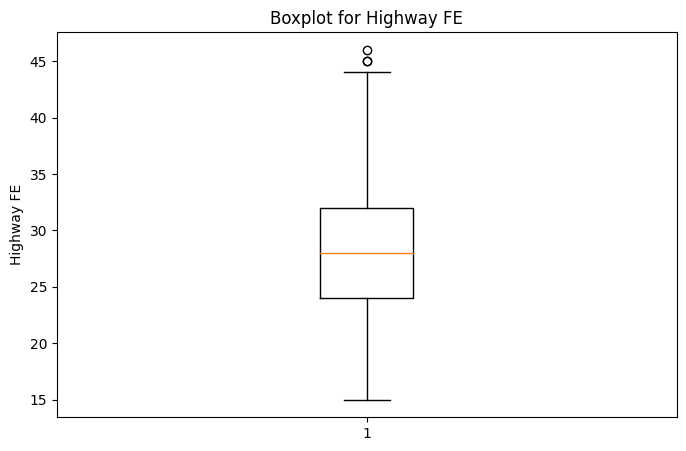

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
304,2015,Volkswagen Group of,Volkswagen,Golf,2.0,4,Manual,31,45,36,Turbocharged,Manual,6,"2-Wheel Drive, Front",Compact Cars,2014-07-28,331,224,283
308,2015,Volkswagen Group of,Volkswagen,Jetta,2.0,4,Auto,31,45,36,Turbocharged,Automated Manual- Selectable (e.g. Automated M...,6,"2-Wheel Drive, Front",Compact Cars,2014-08-04,324,228,281
309,2015,Volkswagen Group of,Volkswagen,Jetta,2.0,4,Manual,31,46,36,Turbocharged,Manual,6,"2-Wheel Drive, Front",Compact Cars,2014-07-28,332,223,283


In [48]:
generate_boxplot_and_get_outliers(df_no_duplicates, 'Highway FE')

**Combined FE**

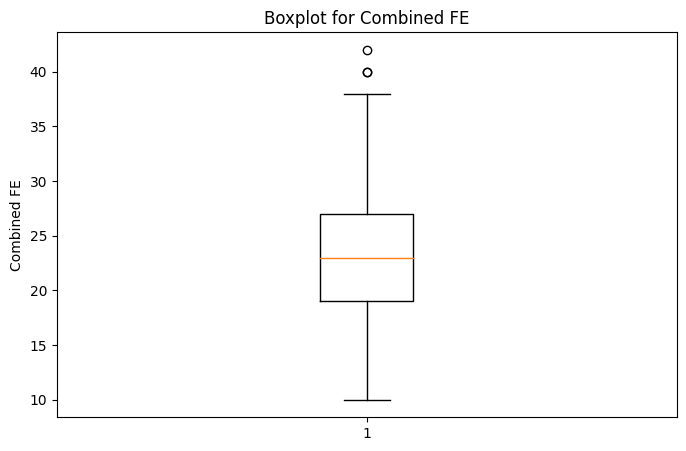

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
282,2015,Mitsubishi Motors Co,Mitsubishi Motors Corporation,MIRAGE,1.2,3,Auto,37,44,40,Naturally Aspirated,Continuously Variable,1,"2-Wheel Drive, Front",Compact Cars,2014-06-01,241,199,222
386,2015,Ford Motor Company,Ford,FUSION HYBRID FWD,2.0,4,Auto,44,41,42,Naturally Aspirated,Continuously Variable,1,"2-Wheel Drive, Front",Midsize Cars,2014-07-07,202,218,209
410,2015,Ford Motor Company,Lincoln,MKZ HYBRID FWD,2.0,4,Auto,41,39,40,Naturally Aspirated,Continuously Variable,1,"2-Wheel Drive, Front",Midsize Cars,2014-07-02,216,228,222


In [49]:
generate_boxplot_and_get_outliers(df_no_duplicates, 'Combined FE')

#### 4.3.2. CO2 Emission.
**City CO2**

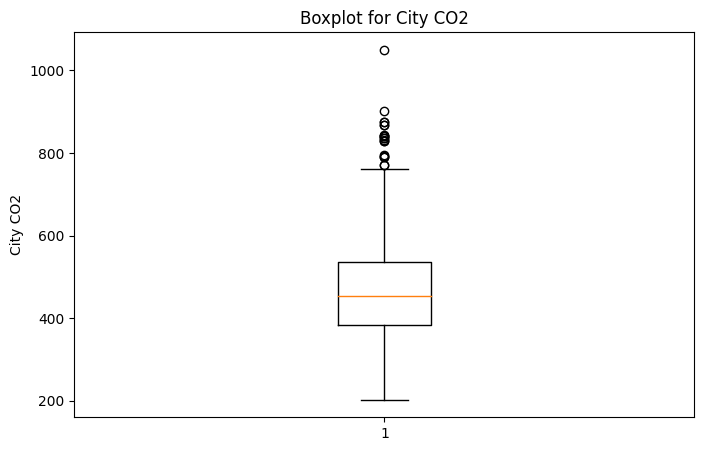

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
8,2015,Volkswagen Group of,Audi,R8,4.2,8,Manual,11,20,14,Naturally Aspirated,Manual,6,All Wheel Drive,Two Seaters,2014-06-09,772,439,622
12,2015,Volkswagen Group of,Audi,R8 Spyder,4.2,8,Manual,11,20,14,Naturally Aspirated,Manual,6,All Wheel Drive,Two Seaters,2014-06-09,772,439,622
21,2015,Volkswagen Group of,Bugatti,Veyron,8.0,16,Auto,8,15,10,Turbocharged,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-05-23,1050,599,847
25,2015,Volkswagen Group of,Lamborghini,Aventador Coupe,6.5,12,Auto,11,18,13,Naturally Aspirated,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-07-04,836,481,676
26,2015,Volkswagen Group of,Lamborghini,Aventador Roadster,6.5,12,Auto,10,16,12,Naturally Aspirated,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-07-04,902,547,742
28,2015,Volkswagen Group of,Lamborghini,Veneno Roadster,6.5,12,Auto,11,17,13,Naturally Aspirated,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-07-04,831,523,692
331,2015,Volkswagen Group of,Bentley,Mulsanne,6.8,8,Auto,11,18,13,Turbocharged,Semi-Automatic,8,"2-Wheel Drive, Rear",Midsize Cars,2014-05-01,840,501,688
531,2015,General Motors,Chevrolet,G2500 EXPRESS CONV 2WD CARGOMDPV,6.0,8,Auto,10,15,12,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Cargo Types",2014-07-21,875,590,747
532,2015,General Motors,Chevrolet,G2500 EXPRESS CONV 2WD CARGOMDPV,6.0,8,Auto,10,15,12,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Cargo Types",2014-07-21,868,582,740
533,2015,General Motors,GMC,G2500 SAVANA CONV 2WD CARGO MDPV,6.0,8,Auto,10,15,12,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Cargo Types",2014-07-21,875,590,747


In [50]:
generate_boxplot_and_get_outliers(df_no_duplicates, 'City CO2')

**Highway CO2**

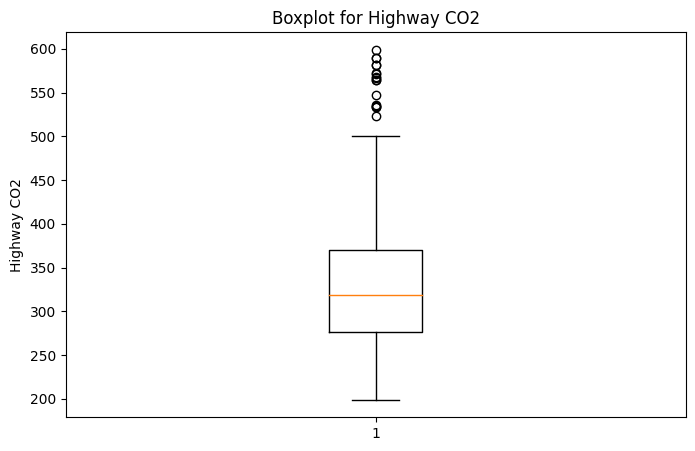

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
21,2015,Volkswagen Group of,Bugatti,Veyron,8.0,16,Auto,8,15,10,Turbocharged,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-05-23,1050,599,847
26,2015,Volkswagen Group of,Lamborghini,Aventador Roadster,6.5,12,Auto,10,16,12,Naturally Aspirated,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-07-04,902,547,742
28,2015,Volkswagen Group of,Lamborghini,Veneno Roadster,6.5,12,Auto,11,17,13,Naturally Aspirated,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-07-04,831,523,692
531,2015,General Motors,Chevrolet,G2500 EXPRESS CONV 2WD CARGOMDPV,6.0,8,Auto,10,15,12,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Cargo Types",2014-07-21,875,590,747
532,2015,General Motors,Chevrolet,G2500 EXPRESS CONV 2WD CARGOMDPV,6.0,8,Auto,10,15,12,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Cargo Types",2014-07-21,868,582,740
533,2015,General Motors,GMC,G2500 SAVANA CONV 2WD CARGO MDPV,6.0,8,Auto,10,15,12,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Cargo Types",2014-07-21,875,590,747
534,2015,General Motors,GMC,G2500 SAVANA CONV 2WD CARGO MDPV,6.0,8,Auto,10,15,12,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Cargo Types",2014-07-21,868,582,740
535,2015,General Motors,Chevrolet,G2500 EXPRESS 2WD PASS MDPV,4.8,8,Auto,11,17,13,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Passenger Type",2014-07-21,791,534,675
536,2015,General Motors,Chevrolet,G2500 EXPRESS 2WD PASS MDPV,6.0,8,Auto,11,16,13,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Passenger Type",2014-07-21,830,564,710
538,2015,General Motors,Chevrolet,G3500 EXPRESS 2WD PASS MDPV,4.8,8,Auto,11,17,13,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Passenger Type",2014-07-21,794,536,678


In [51]:
generate_boxplot_and_get_outliers(df_no_duplicates, 'Highway CO2')

**Combined CO2**

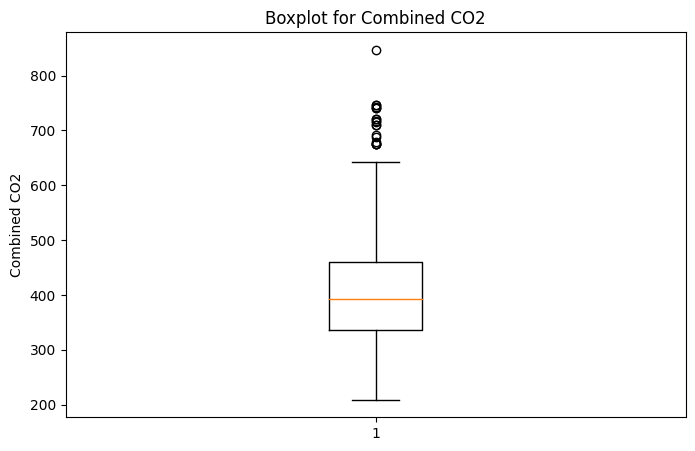

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
21,2015,Volkswagen Group of,Bugatti,Veyron,8.0,16,Auto,8,15,10,Turbocharged,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-05-23,1050,599,847
25,2015,Volkswagen Group of,Lamborghini,Aventador Coupe,6.5,12,Auto,11,18,13,Naturally Aspirated,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-07-04,836,481,676
26,2015,Volkswagen Group of,Lamborghini,Aventador Roadster,6.5,12,Auto,10,16,12,Naturally Aspirated,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-07-04,902,547,742
28,2015,Volkswagen Group of,Lamborghini,Veneno Roadster,6.5,12,Auto,11,17,13,Naturally Aspirated,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-07-04,831,523,692
331,2015,Volkswagen Group of,Bentley,Mulsanne,6.8,8,Auto,11,18,13,Turbocharged,Semi-Automatic,8,"2-Wheel Drive, Rear",Midsize Cars,2014-05-01,840,501,688
531,2015,General Motors,Chevrolet,G2500 EXPRESS CONV 2WD CARGOMDPV,6.0,8,Auto,10,15,12,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Cargo Types",2014-07-21,875,590,747
532,2015,General Motors,Chevrolet,G2500 EXPRESS CONV 2WD CARGOMDPV,6.0,8,Auto,10,15,12,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Cargo Types",2014-07-21,868,582,740
533,2015,General Motors,GMC,G2500 SAVANA CONV 2WD CARGO MDPV,6.0,8,Auto,10,15,12,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Cargo Types",2014-07-21,875,590,747
534,2015,General Motors,GMC,G2500 SAVANA CONV 2WD CARGO MDPV,6.0,8,Auto,10,15,12,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Cargo Types",2014-07-21,868,582,740
535,2015,General Motors,Chevrolet,G2500 EXPRESS 2WD PASS MDPV,4.8,8,Auto,11,17,13,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Passenger Type",2014-07-21,791,534,675


In [52]:
generate_boxplot_and_get_outliers(df_no_duplicates, 'Combined CO2')

The decision to retain the outliers discovered in the dataset, is because these values may yield valuable insights into our analysis of car types. To gain a more comprehensive understanding of the dataset, it is essential to conduct both normal distribution to take further decisions.

### 4.4. Normal Distribution

To rigorously assess dataset normality, the following steps are employed:

-   **Data Plots:** Initial visual inspection through data plots, including histograms and Q-Q plots, serves as a preliminary assessment. Departures from a bell-shaped curve or a straight line in Q-Q plots may indicate non-normality.

-   **Skewness Test:** A skewness test quantifies data asymmetry. Positive or negative values indicate skewness. Values close to zero suggest normality.

-   **Shapiro-Wilk Test:** This formal statistical test provides a definitive verdict on normality. A p-value less than the significance level indicates non-normality.

These steps allow a conclusive determination of whether the dataset adheres to a normal distribution or deviates from it.

**Analysis for Fuel Economy:**

***City FE***

-   **Data Plots.**

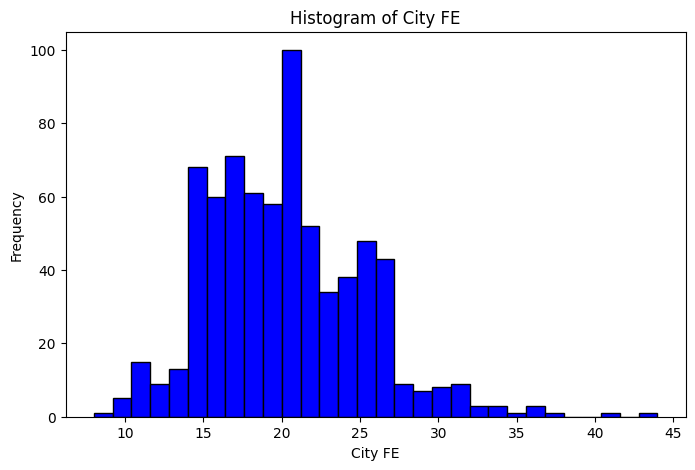

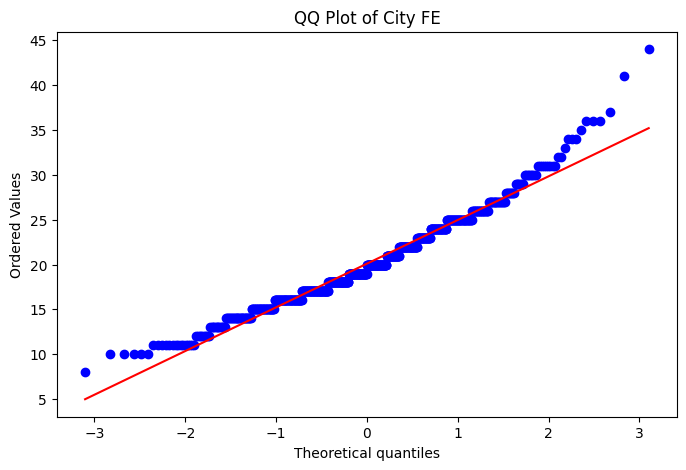

In [55]:
# Create a histogram
plt.figure(figsize=(8, 5))
plt.hist(df_no_duplicates['City FE'], bins=30, color='blue', edgecolor='black')
plt.title("Histogram of City FE")
plt.xlabel("City FE")
plt.ylabel("Frequency")

# Create a QQ plot
plt.figure(figsize=(8, 5))
stats.probplot(df_no_duplicates['City FE'], dist="norm", plot=plt)
plt.title("QQ Plot of City FE")

plt.show()

-   **Skewness Test.**

In [63]:
# Calculate skewness
skewness_value = skew(df_no_duplicates['City FE'])

# Determine the distribution description
if abs(skewness_value) < 0.5:
    description = "approximately normally distributed"
elif skewness_value < -0.5:
    description = "left-skewed"
elif skewness_value > 0.5:
    description = "right-skewed"
else:
    description = "exhibiting non-normal characteristics"

print(f"City FE data is {description}, value: {skewness_value}")

City FE data is right-skewed, value: 0.6892622563068126


-   **Shapiro-Wilk Test.**

In [61]:
# Perform the Shapiro-Wilk test
shapiro_test_result = shapiro(df_no_duplicates['City FE'])

# Descriptive assessment based on the Shapiro-Wilk test result
if shapiro_test_result.pvalue > 0.05:
    description = "normally distributed"
else:
    description = "non-normally distributed"

print(f"City FE data is {description}, p-value: {shapiro_test_result.pvalue}")

City FE data is non-normally distributed, p-value: 6.490363801958665e-11


***Highway FE***

-   **Data Plots.**

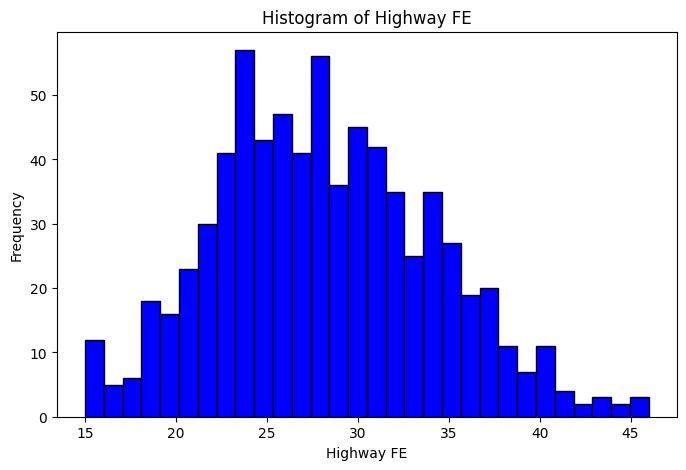

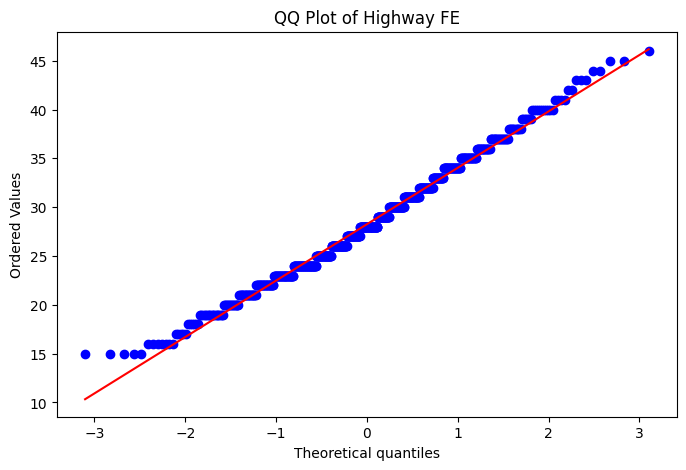

In [62]:
# Create a histogram
plt.figure(figsize=(8, 5))
plt.hist(df_no_duplicates['Highway FE'], bins=30, color='blue', edgecolor='black')
plt.title("Histogram of Highway FE")
plt.xlabel("Highway FE")
plt.ylabel("Frequency")

# Create a QQ plot
plt.figure(figsize=(8, 5))
stats.probplot(df_no_duplicates['Highway FE'], dist="norm", plot=plt)
plt.title("QQ Plot of Highway FE")

plt.show()

-   **Skewness Test.**

In [65]:
# Calculate skewness
skewness_value = skew(df_no_duplicates['Highway FE'])

# Determine the distribution description
if abs(skewness_value) < 0.5:
    description = "approximately normally distributed"
elif skewness_value < -0.5:
    description = "left-skewed"
elif skewness_value > 0.5:
    description = "right-skewed"
else:
    description = "exhibiting non-normal characteristics"

print(f"Highway FE data is {description}, value: {skewness_value}")

Highway FE data is approximately normally distributed, value: 0.2533563303278076


-   **Shapiro-Wilk Test.**

In [66]:
# Perform the Shapiro-Wilk test
shapiro_test_result = shapiro(df_no_duplicates['Highway FE'])

# Descriptive assessment based on the Shapiro-Wilk test result
if shapiro_test_result.pvalue > 0.05:
    description = "normally distributed"
else:
    description = "non-normally distributed"

print(f"Highway FE data is {description}, p-value: {shapiro_test_result.pvalue}")

Highway FE data is non-normally distributed, p-value: 0.00013358538853935897


***Combined FE***

-   **Data Plots.**

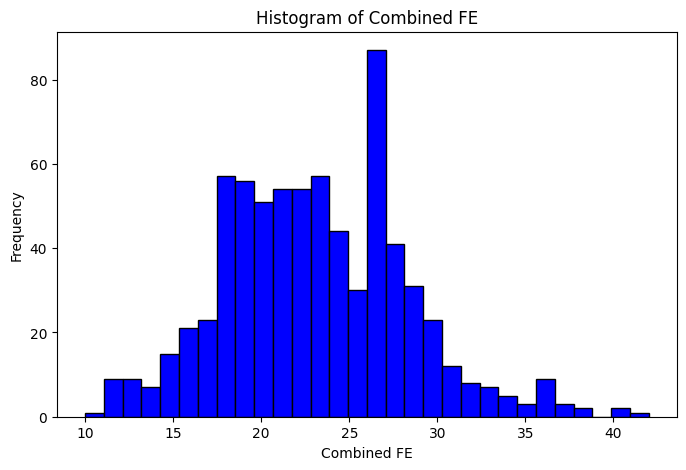

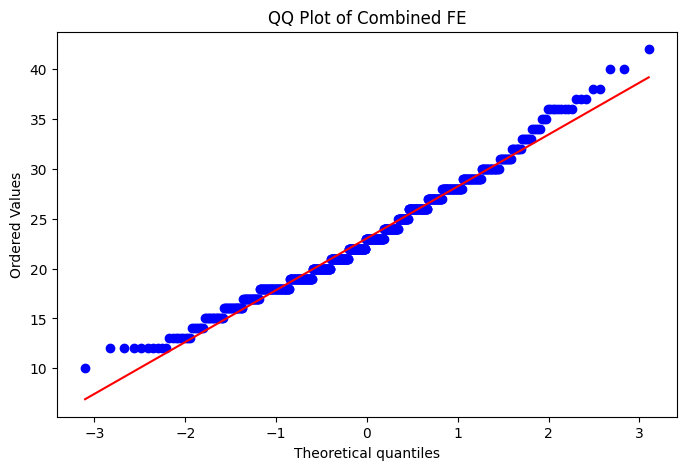

In [67]:
# Create a histogram
plt.figure(figsize=(8, 5))
plt.hist(df_no_duplicates['Combined FE'], bins=30, color='blue', edgecolor='black')
plt.title("Histogram of Combined FE")
plt.xlabel("Combined FE")
plt.ylabel("Frequency")

# Create a QQ plot
plt.figure(figsize=(8, 5))
stats.probplot(df_no_duplicates['Combined FE'], dist="norm", plot=plt)
plt.title("QQ Plot of Combined FE")

plt.show()

-   **Skewness Test.**

In [68]:
# Calculate skewness
skewness_value = skew(df_no_duplicates['Combined FE'])

# Determine the distribution description
if abs(skewness_value) < 0.5:
    description = "approximately normally distributed"
elif skewness_value < -0.5:
    description = "left-skewed"
elif skewness_value > 0.5:
    description = "right-skewed"
else:
    description = "exhibiting non-normal characteristics"

print(f"Combined FE data is {description}, value: {skewness_value}")

Combined FE data is approximately normally distributed, value: 0.41602927502029485


-   **Shapiro-Wilk Test.**

In [69]:
# Perform the Shapiro-Wilk test
shapiro_test_result = shapiro(df_no_duplicates['Combined FE'])

# Descriptive assessment based on the Shapiro-Wilk test result
if shapiro_test_result.pvalue > 0.05:
    description = "normally distributed"
else:
    description = "non-normally distributed"

print(f"Combined FE data is {description}, p-value: {shapiro_test_result.pvalue}")

Combined FE data is non-normally distributed, p-value: 4.951335199621099e-07


The results are:

-   City FE, non-normal distributed.
-   Highway FE, non-normal distributed.
-   Combined FE, non-normal distributed.

**Analysis for CO2:**

***City CO2***

-   **Data Plots.**

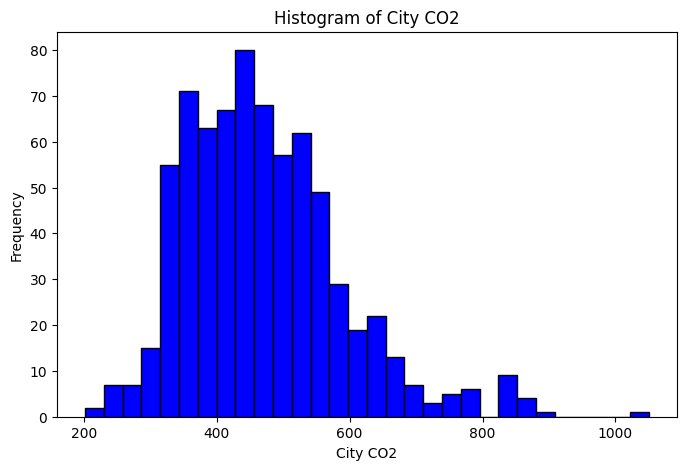

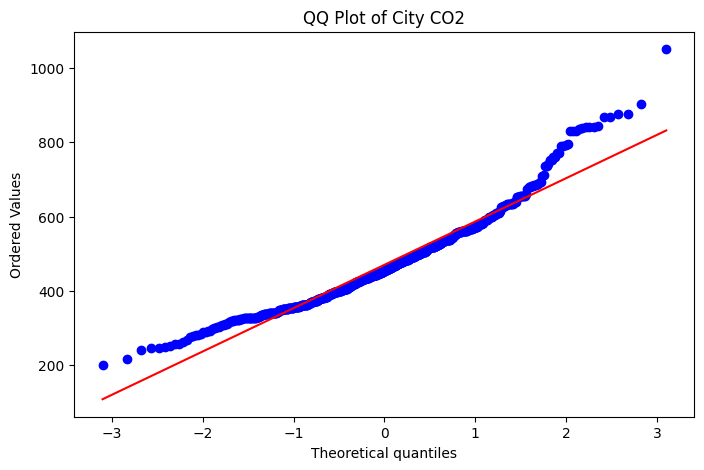

In [70]:
# Create a histogram
plt.figure(figsize=(8, 5))
plt.hist(df_no_duplicates['City CO2'], bins=30, color='blue', edgecolor='black')
plt.title("Histogram of City CO2")
plt.xlabel("City CO2")
plt.ylabel("Frequency")

# Create a QQ plot
plt.figure(figsize=(8, 5))
stats.probplot(df_no_duplicates['City CO2'], dist="norm", plot=plt)
plt.title("QQ Plot of City CO2")

plt.show()

-   **Skewness Test.**

In [71]:
# Calculate skewness
skewness_value = skew(df_no_duplicates['City CO2'])

# Determine the distribution description
if abs(skewness_value) < 0.5:
    description = "approximately normally distributed"
elif skewness_value < -0.5:
    description = "left-skewed"
elif skewness_value > 0.5:
    description = "right-skewed"
else:
    description = "exhibiting non-normal characteristics"

print(f"City CO2 data is {description}, value: {skewness_value}")

City CO2 data is right-skewed, value: 0.9873193333983344


-   **Shapiro-Wilk Test.**

In [72]:
# Perform the Shapiro-Wilk test
shapiro_test_result = shapiro(df_no_duplicates['City CO2'])

# Descriptive assessment based on the Shapiro-Wilk test result
if shapiro_test_result.pvalue > 0.05:
    description = "normally distributed"
else:
    description = "non-normally distributed"

print(f"City CO2 data is {description}, p-value: {shapiro_test_result.pvalue}")

City CO2 data is non-normally distributed, p-value: 4.421420928625618e-15


***Highway CO2***

-   **Data Plots.**

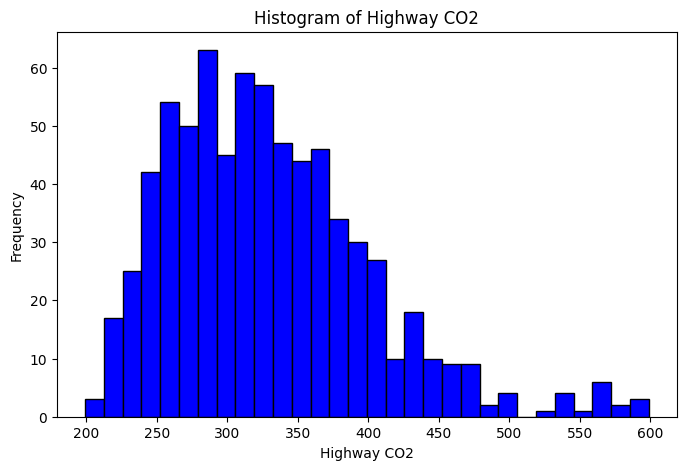

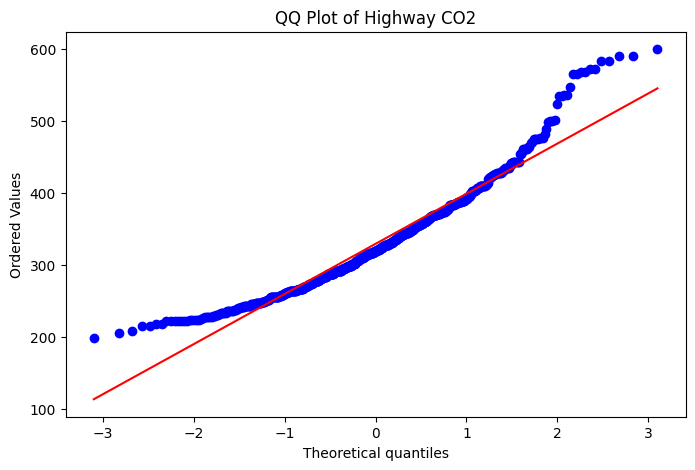

In [73]:
# Create a histogram
plt.figure(figsize=(8, 5))
plt.hist(df_no_duplicates['Highway CO2'], bins=30, color='blue', edgecolor='black')
plt.title("Histogram of Highway CO2")
plt.xlabel("Highway CO2")
plt.ylabel("Frequency")

# Create a QQ plot
plt.figure(figsize=(8, 5))
stats.probplot(df_no_duplicates['Highway CO2'], dist="norm", plot=plt)
plt.title("QQ Plot of Highway CO2")

plt.show()

-   **Skewness Test.**

In [74]:
# Calculate skewness
skewness_value = skew(df_no_duplicates['Highway CO2'])

# Determine the distribution description
if abs(skewness_value) < 0.5:
    description = "approximately normally distributed"
elif skewness_value < -0.5:
    description = "left-skewed"
elif skewness_value > 0.5:
    description = "right-skewed"
else:
    description = "exhibiting non-normal characteristics"

print(f"Highway CO2 data is {description}, value: {skewness_value}")

Highway CO2 data is right-skewed, value: 0.973980911376699


-   **Shapiro-Wilk Test.**

In [75]:
# Perform the Shapiro-Wilk test
shapiro_test_result = shapiro(df_no_duplicates['Highway CO2'])

# Descriptive assessment based on the Shapiro-Wilk test result
if shapiro_test_result.pvalue > 0.05:
    description = "normally distributed"
else:
    description = "non-normally distributed"

print(f"Highway CO2 data is {description}, p-value: {shapiro_test_result.pvalue}")

Highway CO2 data is non-normally distributed, p-value: 9.832834907760749e-16


*Combined CO2*

-   **Data Plots.**

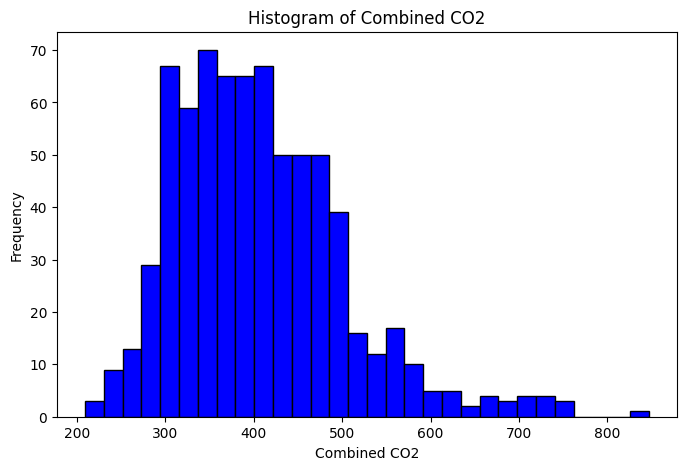

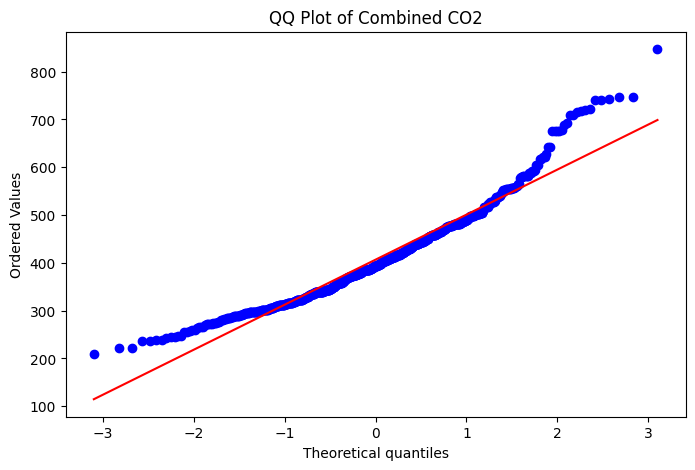

In [76]:
# Create a histogram
plt.figure(figsize=(8, 5))
plt.hist(df_no_duplicates['Combined CO2'], bins=30, color='blue', edgecolor='black')
plt.title("Histogram of Combined CO2")
plt.xlabel("Combined CO2")
plt.ylabel("Frequency")

# Create a QQ plot
plt.figure(figsize=(8, 5))
stats.probplot(df_no_duplicates['Combined CO2'], dist="norm", plot=plt)
plt.title("QQ Plot of Combined CO2")

plt.show()

-   **Skewness Test.**

In [77]:
# Calculate skewness
skewness_value = skew(df_no_duplicates['Combined CO2'])

# Determine the distribution description
if abs(skewness_value) < 0.5:
    description = "approximately normally distributed"
elif skewness_value < -0.5:
    description = "left-skewed"
elif skewness_value > 0.5:
    description = "right-skewed"
else:
    description = "exhibiting non-normal characteristics"

print(f"Combined CO2 data is {description}, value: {skewness_value}")

Combined CO2 data is right-skewed, value: 0.9927269862444783


-   **Shapiro-Wilk Test.**

In [78]:
# Perform the Shapiro-Wilk test
shapiro_test_result = shapiro(df_no_duplicates['Combined CO2'])

# Descriptive assessment based on the Shapiro-Wilk test result
if shapiro_test_result.pvalue > 0.05:
    description = "normally distributed"
else:
    description = "non-normally distributed"

print(f"Combined CO2 data is {description}, p-value: {shapiro_test_result.pvalue}")

Combined CO2 data is non-normally distributed, p-value: 2.102513652004097e-15


The results are:

-   City CO2, non-normal distributed.
-   Highway CO2, non-normal distributed.
-   Combined CO2, non-normal distributed.

### 4.5. Feature Selection.

Feature selection is a crucial step in data analysis, especially when dealing with similar data fields or variables that may have strong correlations. Its purpose is to identify and choose the most relevant and informative variables while discarding redundant or less important ones by using a correlation analysis.

**Correlation Analysis.** Due to the data is not normal distributed **Nonparametric test** should be perform

***Fuel Economy***

              City FE  Highway FE  Combined FE
City FE      1.000000    0.942269     0.990612
Highway FE   0.942269    1.000000     0.971611
Combined FE  0.990612    0.971611     1.000000


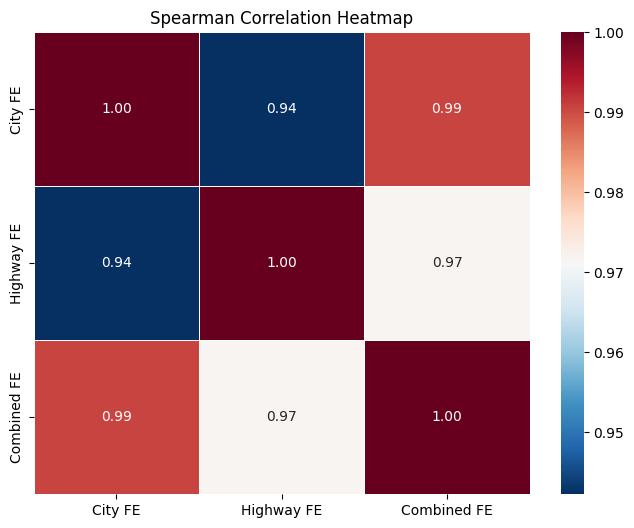

In [79]:
# Select the columns you want to include
selected_columns = ['City FE', 'Highway FE', 'Combined FE']

# Create a DataFrame with selected columns
data = df_no_duplicates[selected_columns]

# Calculate Spearman correlation matrix
correlation_matrix = data.corr(method='spearman')

# Print the correlation matrix
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap="RdBu_r", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()

***CO2***

              City CO2  Highway CO2  Combined CO2
City CO2      1.000000     0.942883      0.993380
Highway CO2   0.942883     1.000000      0.973247
Combined CO2  0.993380     0.973247      1.000000


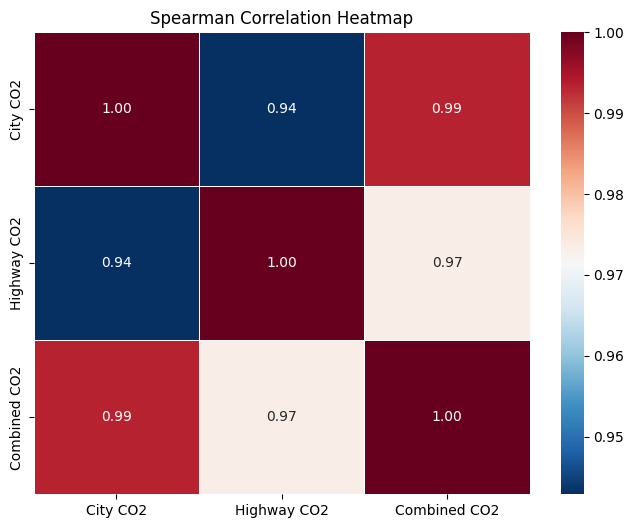

In [80]:
# Select the columns you want to include
selected_columns = ['City CO2', 'Highway CO2', 'Combined CO2']

# Create a DataFrame with selected columns
data = df_no_duplicates[selected_columns]

# Calculate Spearman correlation matrix
correlation_matrix = data.corr(method='spearman')

# Print the correlation matrix
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap="RdBu_r", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()

As evident from the preceding images, the Spearman correlation test was selected. Spearman Rank Correlation (Spearman's rho) is a statistical method suitable for assessing relationships in non-normally distributed, non-linear, and ordinal data by capturing monotonic associations through the use of ranked data.

Based on the correlation results, we observe that the relationships between these three datafields are closely aligned. Additionally, considering my specific focus on urban areas, I can confidently select **City FE** as the most pertinent variable for my analysis. This choice is substantiated by the similarity in correlations and aligns with the urban-centric nature of my research.

### 4.6. Correlations: Insights & Implications.

**Fuel Economy**

                      CityFE  Cylinders  EngineDisplacement  Division
CityFE              1.000000  -0.874796           -0.893162  0.259396
Cylinders          -0.874796   1.000000            0.933078 -0.255862
EngineDisplacement -0.893162   0.933078            1.000000 -0.195778
Division            0.259396  -0.255862           -0.195778  1.000000


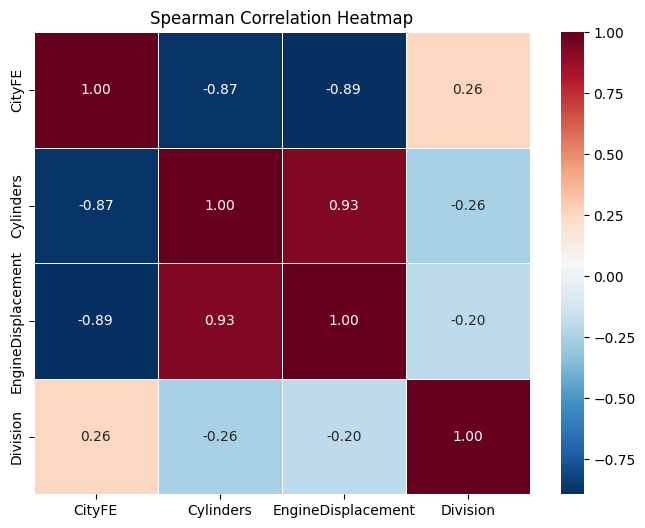

In [82]:
# Convert categorical columns to ranks
ranks_cy = df_no_duplicates['# Cylinders'].rank()
ranks_ed = df_no_duplicates['Engine Displacement'].rank()
ranks_di = df_no_duplicates['Division'].rank()

# Create a DataFrame with converted ranks and other columns
data = pd.DataFrame({
    'CityFE': df_no_duplicates['City FE'],
    'Cylinders': ranks_cy,
    'EngineDisplacement': ranks_ed,
    'Division': ranks_di
})

# Calculate Spearman correlation matrix
correlation_matrix = data.corr(method='spearman')

# Print the correlation matrix
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap="RdBu_r", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()

**CO2 Emission**

                     CityCO2  Cylinders  EngineDisplacement  Division
CityCO2             1.000000   0.883346            0.899508 -0.273431
Cylinders           0.883346   1.000000            0.933078 -0.255862
EngineDisplacement  0.899508   0.933078            1.000000 -0.195778
Division           -0.273431  -0.255862           -0.195778  1.000000


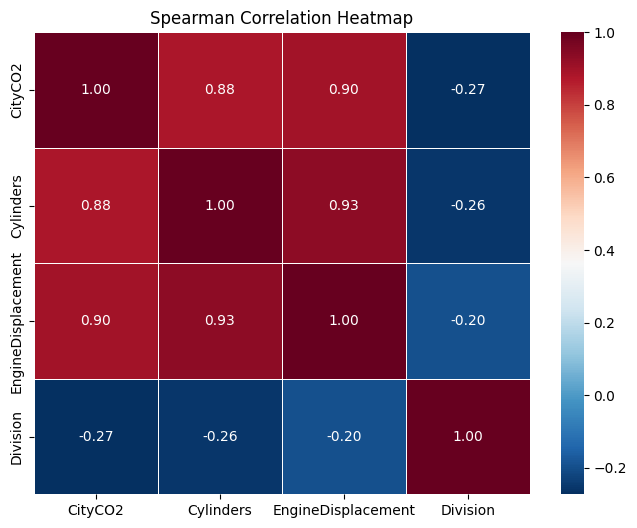

In [83]:
# Convert categorical columns to ranks
ranks_cy = df_no_duplicates['# Cylinders'].rank()
ranks_ed = df_no_duplicates['Engine Displacement'].rank()
ranks_di = df_no_duplicates['Division'].rank()

# Create a DataFrame with converted ranks and other columns
data = pd.DataFrame({
    'CityCO2': df_no_duplicates['City CO2'],
    'Cylinders': ranks_cy,
    'EngineDisplacement': ranks_ed,
    'Division': ranks_di
})

# Calculate Spearman correlation matrix
correlation_matrix = data.corr(method='spearman')

# Print the correlation matrix
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap="RdBu_r", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()

The results presented above indicate that there is a statistically significant correlation between City FE variable and the three independent variables (Number of Cylinders, Engine Displacement , Division). To further explain this relationship:

-   There is a strong negative correlation between City Fuel Economy (FE) and Engine Displacement, Number of Cylinders.

-   A weak negative correlation exists between City Fuel Economy and Division.

-   There is a strong positive correlation between City CO2 and Number of Cylinders, and Engine Displacement.

-   A weak positive correlation is observed between City Fuel Economy and Number of Gears.

### 4.7. Visual Insights into Fuel Economy and CO2.

#### 4.7.1. Fuel Economy.

**Number of Cylinders**

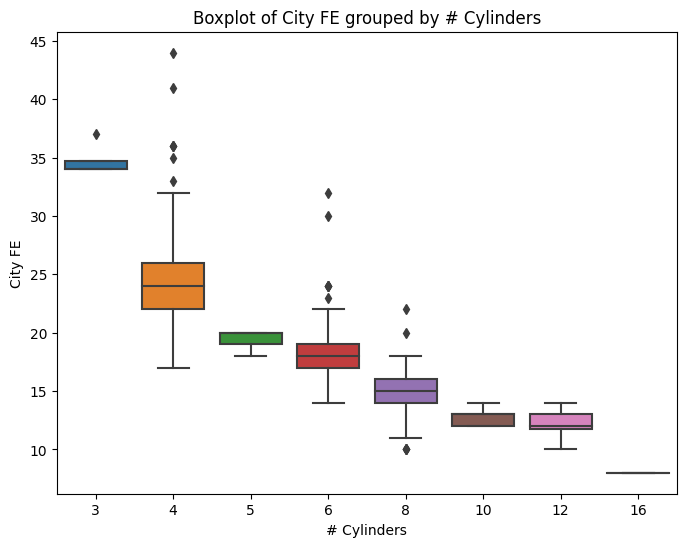

In [86]:
# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='# Cylinders', y='City FE', data=df_no_duplicates)
plt.xlabel("# Cylinders")
plt.ylabel("City FE")
plt.title("Boxplot of City FE grouped by # Cylinders")
plt.show()

**Engine Displacement**

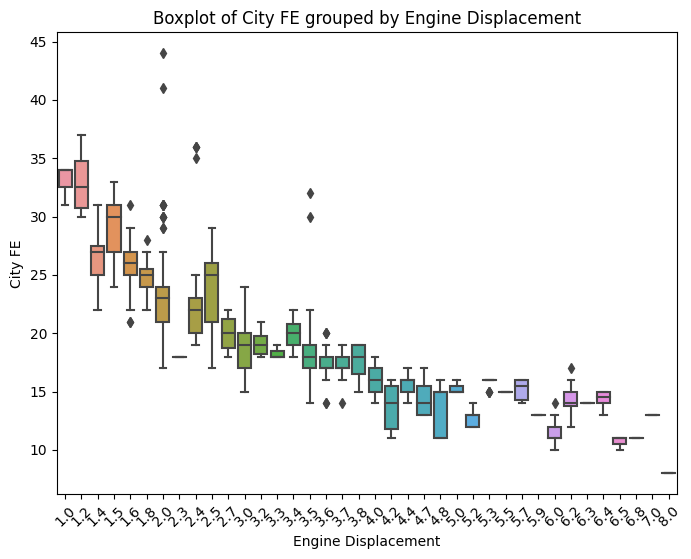

In [89]:
# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Engine Displacement', y='City FE', data=df_no_duplicates)
plt.xlabel("Engine Displacement")
plt.ylabel("City FE")
plt.title("Boxplot of City FE grouped by Engine Displacement")
plt.xticks(rotation=45)
plt.show()

**Division**

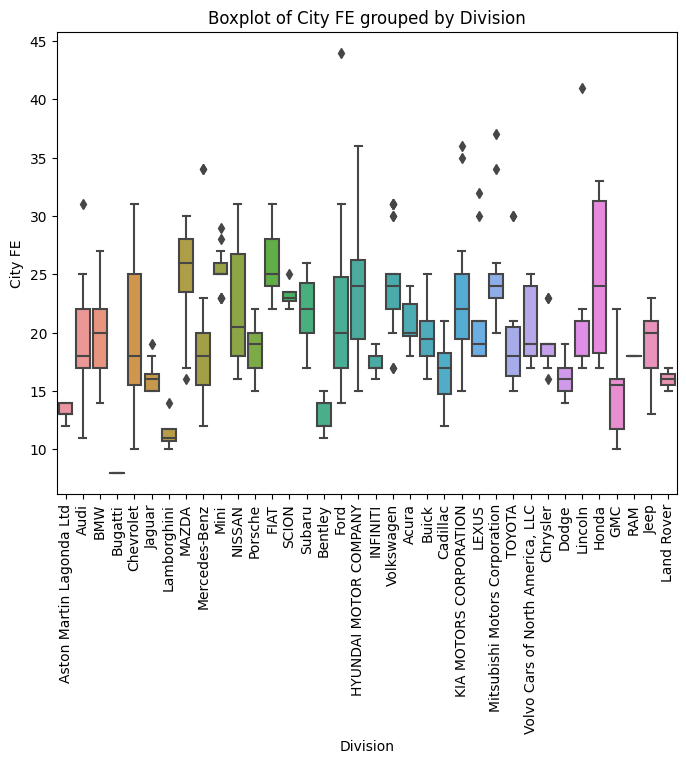

In [91]:
# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Division', y='City FE', data=df_no_duplicates)
plt.xlabel("Division")
plt.ylabel("City FE")
plt.title("Boxplot of City FE grouped by Division")
plt.xticks(rotation=90)
plt.show()

#### 4.7.2. CO2 Emission.

**Number of Cylinders**

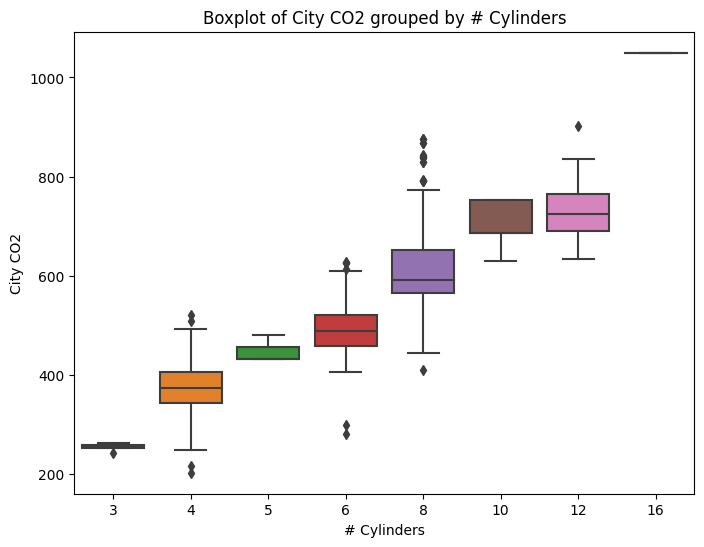

In [92]:
# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='# Cylinders', y='City CO2', data=df_no_duplicates)
plt.xlabel("# Cylinders")
plt.ylabel("City CO2")
plt.title("Boxplot of City CO2 grouped by # Cylinders")
plt.show()

**Engine Displacement**

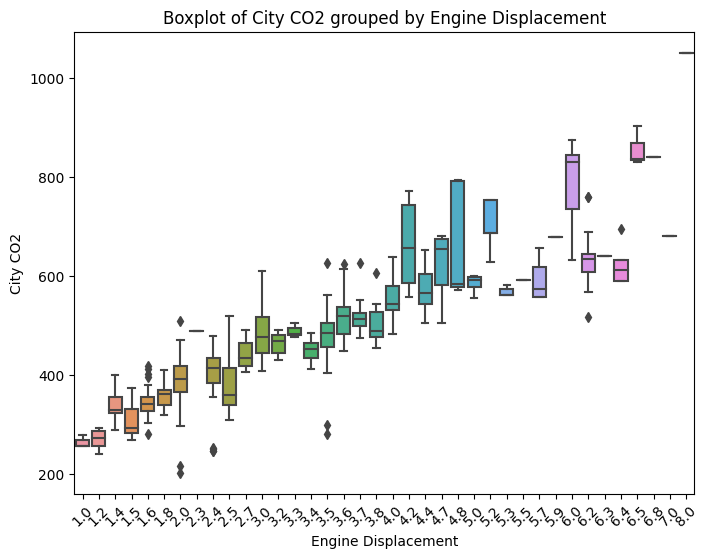

In [93]:
# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Engine Displacement', y='City CO2', data=df_no_duplicates)
plt.xlabel("Engine Displacement")
plt.ylabel("City CO2")
plt.title("Boxplot of City CO2 grouped by Engine Displacement")
plt.xticks(rotation=45)
plt.show()

**Division**

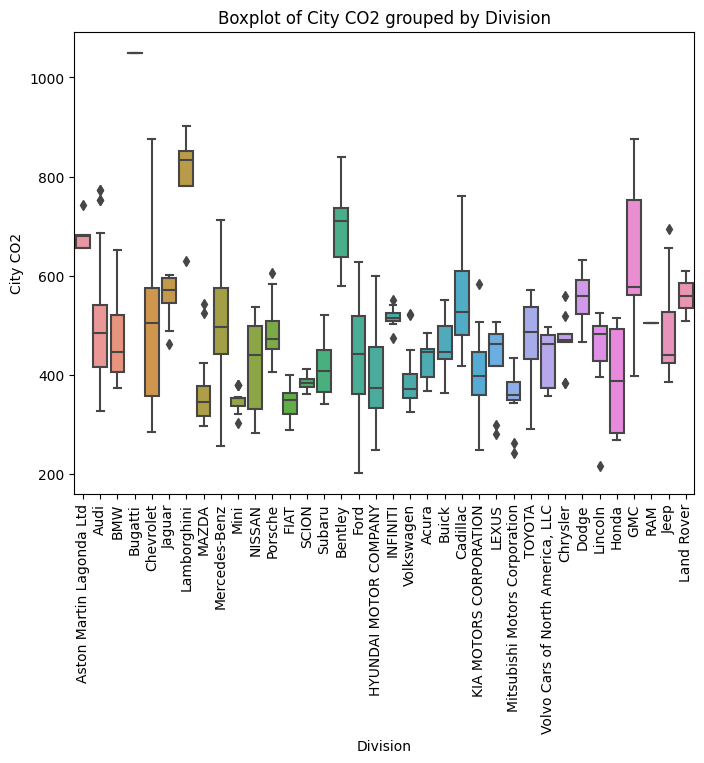

In [94]:
# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Division', y='City CO2', data=df_no_duplicates)
plt.xlabel("Division")
plt.ylabel("City CO2")
plt.title("Boxplot of City CO2 grouped by Division")
plt.xticks(rotation=90)
plt.show()

## 5. Validating Hypotheses and Addressing Research Questions.

To accept or reject the null Hypotesis stated on [2. Research Question], we need to use Kruskal-Wallis test, knowing that the does not follow normal distribution, to do that we need execute the following code:

In [96]:
# Create a DataFrame with selected columns
kruskal_data = df_no_duplicates[['City FE', 'City CO2', '# Cylinders', 'Engine Displacement', 'Division']]

# Initialize a dictionary to store the results
kruskal_results = {}

# Loop through combinations of numeric and categorical variables
numeric_vars = ['City FE', 'City CO2']
category_vars = ['# Cylinders', 'Engine Displacement', 'Division']

for numeric_var in numeric_vars:
    for category_var in category_vars:
        result_name = f"{numeric_var} vs {category_var}"

        # Perform Kruskal-Wallis test
        groups = [group[1] for group in kruskal_data.groupby(category_var)]
        result = kruskal(*groups)

        # Store the results in the dictionary
        kruskal_results[result_name] = result

# Print the results
for result_name, result in kruskal_results.items():
    print(result_name)
    print(result)
    print()

City FE vs # Cylinders
KruskalResult(statistic=array([552.0796689 , 562.66313999, 721.        , 628.35878483,
        68.14645347]), pvalue=array([5.03747699e-115, 2.65817882e-117, 2.04427848e-151, 1.89867258e-131,
       3.49716716e-012]))

City FE vs Engine Displacement
KruskalResult(statistic=array([602.44108881, 613.87315094, 705.25568064, 721.        ,
       230.27825004]), pvalue=array([2.58387152e-103, 1.18088116e-105, 1.90574531e-124, 1.06792120e-127,
       9.16740403e-030]))

City FE vs Division
KruskalResult(statistic=array([309.15747942, 317.65705807, 306.62992147, 307.27659466,
       721.        ]), pvalue=array([1.27139185e-045, 2.82881105e-047, 3.93302429e-045, 2.94639886e-045,
       5.16906129e-129]))

City CO2 vs # Cylinders
KruskalResult(statistic=array([552.0796689 , 562.66313999, 721.        , 628.35878483,
        68.14645347]), pvalue=array([5.03747699e-115, 2.65817882e-117, 2.04427848e-151, 1.89867258e-131,
       3.49716716e-012]))

City CO2 vs Engine Displac

The result is p-values less than 2.2e-16 is a very strong indication that there is a significant effect or difference in your data, and you can confidently reject the null hypothesis in favor of the alternative hypothesis.

| Fuel Economy                                                                                                           | CO2 Emission                                                                                                                   | Results      |
|---------------------------|---------------------------|------------------|
| **H0:** There is no difference in City FE between vehicles with different Cylinders, Engine Displacement and Division. | **H0:** There is no difference in City CO2 between vehicles with different Cylinders, Gears, Engine Displacement and Division. | **REJECTED** |
| **H1:** There is difference in City FE between vehicles with different Cylinders, Engine Displacement and Division.    | **H1:** There is difference in City CO2 between vehicles with different Cylinders, Gears, Engine Displacement and Division.    | **ACCEPTED** |

From the above conclusion, we can say there is a relation between Fuel Economy and CO2 emissions, gathering all the information is possible to answer the research questions formulated in the context.

-   What type of car provides the most fuel economy?

-   What type of car is environmentally friendly?

The type of car that provides the most FE and lowest CO2 emission can be defined with the following characteristics:

-   Reducing the number of cylinders tents to decreased fuel consumption.

-   Smaller engines typically have lower fuel consumption.

-   Ford Cars are well know to build cars for the average men.

We can assert with confidence that vehicles with higher fuel economy are inherently more environmentally friendly, especially within the urban sector. Higher fuel economy signifies efficient use of fuel resources, leading to reduced emissions and a more sustainable transportation system in urban areas.

## 6. Recommendations.

To simplify data handling, it's advisable to utilize standardized values and avoid working with different units of measurement.

The code and results are inside of its folder Language, take a look. Your curiosity is the key to unlocking the wonders of our research!

For any inquiries or further details, please [contact me](mailto:erickborda96@.com).